In [1]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image
import cv2


%matplotlib inline


#이미지 호출에 따른 흑백 또는 컬러로 출력
def imshow(tit,image):
    plt.title(tit)
    if len(image.shape) == 3: #행렬의 크기가 나옴, 컬러영상일경우 3이 나옴
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else: # 흑백영상일 경우 2가 나옴
        plt.imshow(image, cmap='gray')
    plt.show()

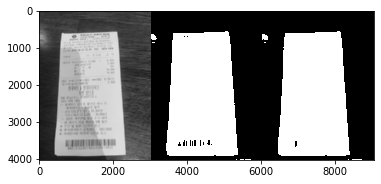

전체 도형 shpae = 5


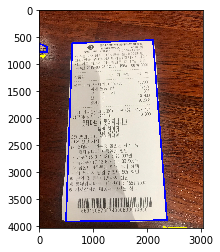

True

In [195]:
img = cv2.imread('./data/mart.jpg')
img_copy = img.copy()

#그늘은 노이즈라 생각하면 된다.먼저 그레이로 변경
gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
#imshow('',gray)

#노이즈가 있으므로 제거해줘야 함, 블러링 ㄱㄱ
gray_blur = cv2.GaussianBlur(gray, (41,41), 50 )
#imshow('',gray_blur)

#잡음제거 ,어느 값 이하는 다 0으로 떨어지게 하고ㅇㅋ?
_,binary = cv2.threshold(gray_blur, 0, 255 , cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#binary = 255 -binary
#imshow('',binary)

#팽창후 침식, 비어있는 구멍 채운 후 원래사이즈로 복귀 , 구멍메꾸기
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE,
                         cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)), 
                          iterations = 20 )
#imshow('',closed)

imshow('',np.hstack([gray_blur, binary,  closed ]))

#변조방지
cont_img = closed.copy()

#바운더리(꼭지점?) 찾기
#findContours 함수는 원본이미지를 변경시키기 때문에 copy를 미리 사용한다.
contours, _ = cv2.findContours(cont_img,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
#print(contours)
print( f"전체 도형 shpae = {len(contours)}")

for con in contours:
    peri = cv2.arcLength(con,True)
    approx = cv2.approxPolyDP(con, 0.1*peri, True)
    area = cv2.contourArea(con) # 컨투어의 영역(면적)을 계산, 실수값으로 나옴
    
    #print(f"shape={len(con)}  length={peri} approx={len(approx)} area={area}")
    
    if len(approx) == 4:
        cv2.drawContours(img, [approx], -1, (255, 0, 0), 30) #두번째 배열처럼 넣어줘야함
    elif len(approx) == 5:
        cv2.drawContours(img, [approx], -1, (255, 255, 0), 40) #두번째 배열처럼 넣어줘야함
    else:
        cv2.drawContours(img, [approx], -1, (0, 255, 255), 40) #두번째 배열처럼 넣어줘야함

imshow('',img)
cv2.imwrite('./data/detect_mart.png', img)